# Case Study: ED Time Series

## Exploring add plotting before forecasting.

Let's assume you are interested in forecasting the daily number of emergency department attendences at a hospital.  Before that is attempted it is important to understand a time series.  Exploring the time series using `matplotlib` is a good way to gain an understanding.

In this case study you will learn how to:

* Plot a time series
* Adjust monthly time series to account for the different number of days
* Run a smoother through the time series to assess trend.
* Break a time series into its trend and seasonal components.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
from statsmodels.tsa.seasonal import seasonal_decompose

## The ED arrivals dataset.

The dataset we will use represent monthly adult (age > 18) arrivals to an Emergency Department.  The synthetic observations are based on real data between April 2009 and May 2017. 

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm097-datasets/master/ed_mth_ts.csv'
ed_month = pd.read_csv(DATA_URL, index_col='date', parse_dates=True)
ed_month.index.freq = 'MS'

The first thing you should do when exploring a time series is check its length and duration.

In [3]:
#This tells us how many months are in the ts
ed_month.shape 

(98, 1)

In [4]:
#the minimum date
ed_month.index.min()

Timestamp('2009-04-01 00:00:00', freq='MS')

In [5]:
#the maximum date
ed_month.index.max()

Timestamp('2017-05-01 00:00:00', freq='MS')

### How to use Pandas and Matplotlib to visualise a time series

Pandas implements matplotlib functionality as part of its `DataFrame`. The quickest way to visualise a time series in Python is therefore to call the `plot()` method of a `DataFrame`.  

The `plot()` method takes a tuple parameter called `figsize`. The tuple represents the (length, height) of the image.

<AxesSubplot:xlabel='date'>

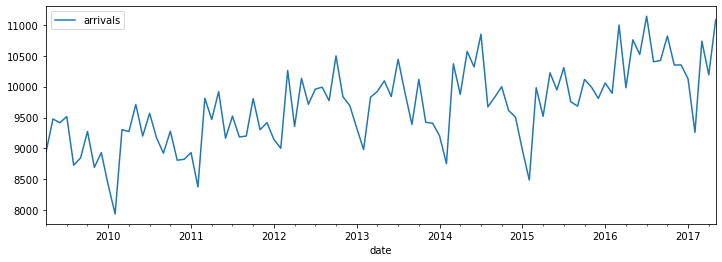

In [6]:
ed_month.plot(figsize=(12,4))

You can then easily to save a high resolution image to file if you would like to use it in a report.

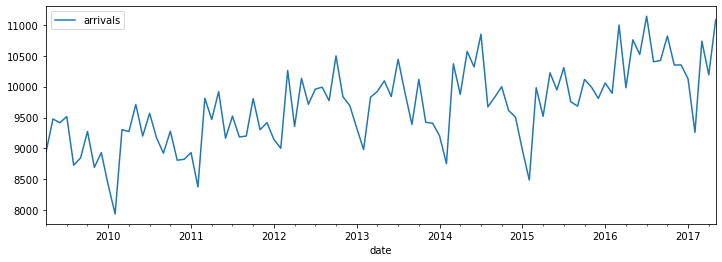

In [7]:
ax = ed_month.plot(figsize=(12,4))
ax.figure.savefig('explore.png', dpi=300)

### Improving the appearance of your time series plot

Matplotlib is very flexible. The full functionality is beyond the scope of this tutorial and it is recommended to review the matplotlib site for examples.  Here we recommend the following parameters to help manipulate your plot.

* `color` e.g. 'green', 'blue' or 'orange'
* `linestyle` e.g. '--' for dashed, '-.' for dash-dot, or '' for none.
* `linewidth` - a number - typically 1, 1.5 or 2 will do.
* `marker` - e.g. 'o' for dots, '+' for crosses, '^' for triangle, and '' for none.

<AxesSubplot:xlabel='date'>

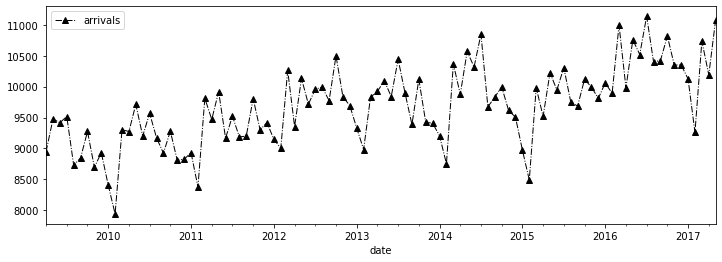

In [8]:
ed_month.plot(figsize=(12,4), color='black', linestyle='-.', marker='^', 
              linewidth=1)

The `plot` method returns an `axis` object. You can use this to manipulate the plot.  The following is often useful for time series plots.

* The y and x scale
* The y and x label.

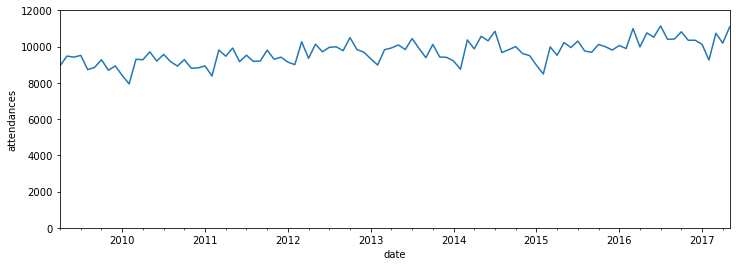

In [9]:
ax = ed_month.plot(figsize=(12,4), legend=False)
_ = ax.set_ylabel('attendances')
_ = ax.set_ylim(0, 12_000)

#### Using Seaborn
You can also use the `seaborn` package to improve the default appearance of your `maplotlib` charts.  

In [10]:
import seaborn as sns
sns.set()

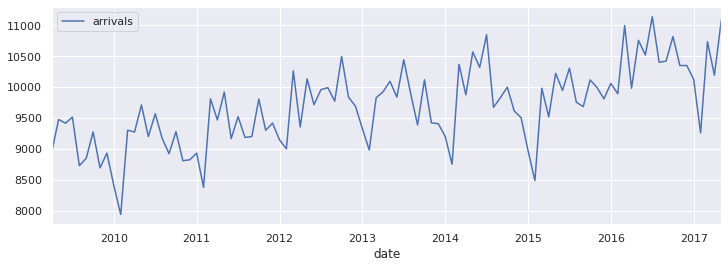

In [11]:
_ = ed_month.plot(figsize=(12,4))

### Visualising monthly data after adjusting for days in the month

When you are working with monthly data, some of the noise you are seeing the time series is due to months having a different number of days.  This makes forecasting harder than it needs to be.  Adjusting the time series by dividing by the number of days per month removes that noise.  

This is very straightforward in pandas, using the built in property `DateTimeIndex.days_in_month`

In [12]:
arrival_rate = ed_month['arrivals'] / ed_month.index.days_in_month

In [13]:
arrival_rate.head()

date
2009-04-01    298.266667
2009-05-01    305.709677
2009-06-01    313.900000
2009-07-01    306.967742
2009-08-01    281.612903
Freq: MS, dtype: float64

In [14]:
ed_month.head()

,arrivals
date,
2009-04-01,8948
2009-05-01,9477
2009-06-01,9417
2009-07-01,9516
2009-08-01,8730


**Note that the units of the time series are now '*attendances / per day*'.**

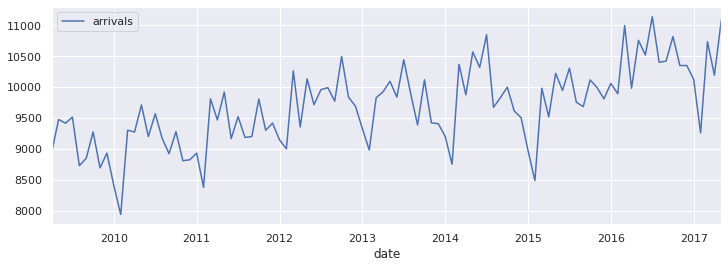

In [15]:
_ = ed_month.plot(figsize=(12,4))

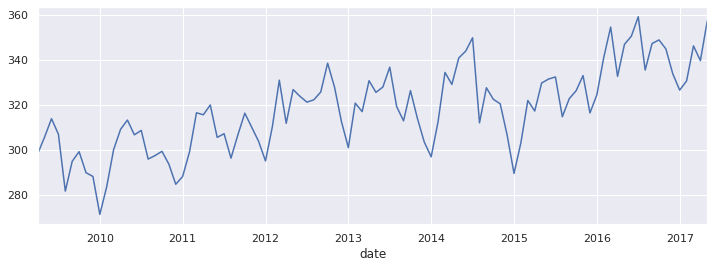

In [16]:
_ = arrival_rate.plot(figsize=(12,4))

## Run a smoother through the time series.

Time series are subject to seasonal patterns and noise.  To help explore the trend in the data you can smooth the time series using a moving average.  

Use the `rolling()` method of a pandas dataframe to create a moving average.

We will run a 12 month moving average through the data.

In [17]:
ma12 = arrival_rate.rolling(window=12, center=True).mean()

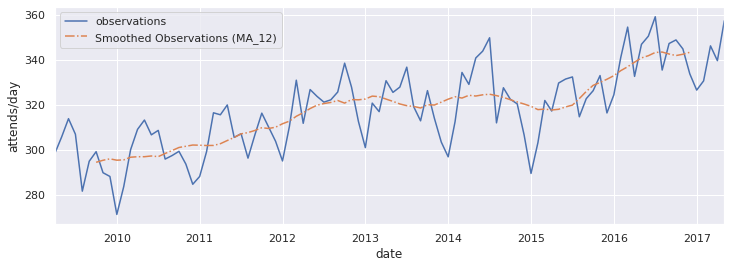

In [18]:
ax = arrival_rate.plot(figsize=(12,4), label='observations')
ma12.plot(ax=ax, linestyle='-.', label='Smoothed Observations (MA_12)')
_ = ax.legend()
_ = ax.set_ylabel('attends/day')

### Breaking a times series up into its trend and seasonal components.

To help visualise and understand trend and seasonality in a time series we can use seasonal decomposition.

This is a model based approach that breaks the time series into three components.  The basic approach to seasonal decomposition has two forms: additive and multiplicative.  

#### Additive decomposition

If we assume that an observation at time t $Y_t$ is the additive sum of trend $T_t$, seasonality $S_t$ and random error $E_t$.  then we have the following model.

$Y_t = T_t + S_t + E_t$

We then to make this assumption when the seasonal fluctuations are constant across the time series.  This looks like a reasonable assumption in the case of the ED data.

#### Multiplicative decomposition

If the seasonal fluctuations of the data grow over time then it is best to a multiplicative model. Where an observation at time t $Y_t$ is the product of multiply the trend $T_t$, seasonality $S_t$ and random error $E_t$

$Y_t = T_t \cdot  S_t \cdot  E_t$


Python has a built in seasonal decomposition method for you to use.  It can be imported from `statsmodels.tsa.seasonal.seasonal_decompose`

In [19]:
#its easy to use. Pass in the ts and specify the model
decomp = seasonal_decompose(arrival_rate, model='additive')

#### Plotting the components

The results of the seasonal decomposition include dataframes containing the trend and seasonality components.  As they are dataframe they can be plotted in the same manner as the raw data.

**Plotting Trend**

<AxesSubplot:xlabel='date'>

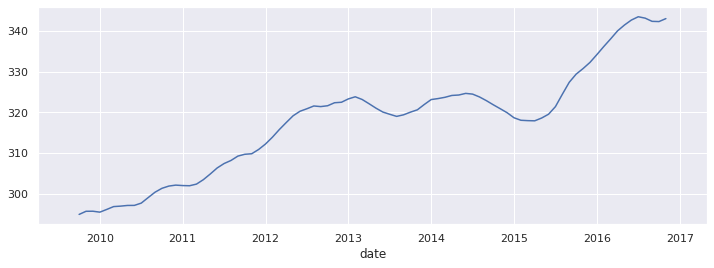

In [20]:
decomp.trend.plot(figsize=(12,4))

**Plotting Seasonality**

<AxesSubplot:xlabel='date'>

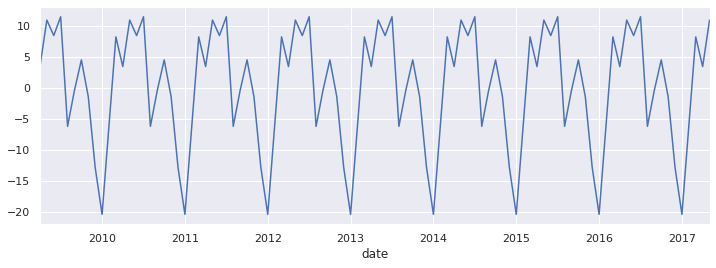

In [21]:
decomp.seasonal.plot(figsize=(12,4))

**Residuals (error)**

<AxesSubplot:xlabel='date'>

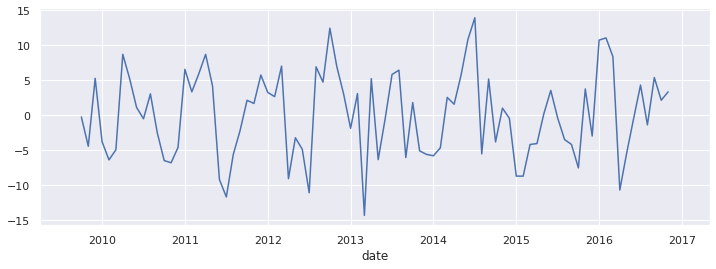

In [22]:
decomp.resid.plot(figsize=(12,4))